In [3]:
#pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [53]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

In [5]:
from xgboost import XGBRegressor # 회귀트리 모델
from xgboost import plot_importance # 중요변수 시각화

In [80]:
from sklearn.model_selection import GridSearchCV

In [9]:
final_train_df=pd.read_csv('final_train_data.csv')
final_train_df

,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,type_y,cluster,Year,Month,Weekday,trend,NewYearsDay,Earthquake,Cyber Monday,Football,Black Friday,Dia de la Madre,no_work_day
0,2013-01-01,1,AUTOMOTIVE,0.000,0,93.14,1420.876311,D,13,2013,1,1,0,True,0,0,0,0,0,True
1,2013-01-01,1,BABY CARE,0.000,0,93.14,1420.876311,D,13,2013,1,1,0,True,0,0,0,0,0,True
2,2013-01-01,1,BEAUTY,0.000,0,93.14,1420.876311,D,13,2013,1,1,0,True,0,0,0,0,0,True
3,2013-01-01,1,BEVERAGES,0.000,0,93.14,1420.876311,D,13,2013,1,1,0,True,0,0,0,0,0,True
4,2013-01-01,1,BOOKS,0.000,0,93.14,1420.876311,D,13,2013,1,1,0,True,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,9,POULTRY,438.133,0,47.57,2155.000000,B,6,2017,8,1,1687,False,0,0,0,0,0,False
3054344,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,2155.000000,B,6,2017,8,1,1687,False,0,0,0,0,0,False
3054345,2017-08-15,9,PRODUCE,2419.729,148,47.57,2155.000000,B,6,2017,8,1,1687,False,0,0,0,0,0,False
3054346,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,2155.000000,B,6,2017,8,1,1687,False,0,0,0,0,0,False


In [10]:
final_test_df=pd.read_csv('final_test_data.csv')
final_test_df

,date,store_nbr,family,onpromotion,dcoilwtico,transactions,type_y,cluster,Year,Month,Weekday,trend,NewYearsDay,Earthquake,Cyber Monday,Football,Black Friday,Dia de la Madre,no_work_day
0,2017-08-16,1,AUTOMOTIVE,0,46.80,1448.259579,D,13,2017,8,2,1688,False,0,0,0,0,0,0
1,2017-08-16,1,BABY CARE,0,46.80,1448.259579,D,13,2017,8,2,1688,False,0,0,0,0,0,0
2,2017-08-16,1,BEAUTY,2,46.80,1448.259579,D,13,2017,8,2,1688,False,0,0,0,0,0,0
3,2017-08-16,1,BEVERAGES,20,46.80,1448.259579,D,13,2017,8,2,1688,False,0,0,0,0,0,0
4,2017-08-16,1,BOOKS,0,46.80,1448.259579,D,13,2017,8,2,1688,False,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,2017-08-31,9,POULTRY,1,47.26,1986.976875,B,6,2017,8,3,1703,False,0,0,0,0,0,0
28508,2017-08-31,9,PREPARED FOODS,0,47.26,1986.976875,B,6,2017,8,3,1703,False,0,0,0,0,0,0
28509,2017-08-31,9,PRODUCE,1,47.26,1986.976875,B,6,2017,8,3,1703,False,0,0,0,0,0,0
28510,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,47.26,1986.976875,B,6,2017,8,3,1703,False,0,0,0,0,0,0


In [14]:
valid_df=final_train_df[final_train_df['date']>='2016-08-01']
valid_df.head()

,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,type_y,cluster,Year,Month,Weekday,trend,NewYearsDay,Earthquake,Cyber Monday,Football,Black Friday,Dia de la Madre,no_work_day
2368278,2016-08-01,1,AUTOMOTIVE,3.0,0,40.05,1750.0,D,13,2016,8,0,1308,False,0,0,0,0,0,False
2368279,2016-08-01,1,BABY CARE,0.0,0,40.05,1750.0,D,13,2016,8,0,1308,False,0,0,0,0,0,False
2368280,2016-08-01,1,BEAUTY,3.0,0,40.05,1750.0,D,13,2016,8,0,1308,False,0,0,0,0,0,False
2368281,2016-08-01,1,BEVERAGES,2418.0,10,40.05,1750.0,D,13,2016,8,0,1308,False,0,0,0,0,0,False
2368282,2016-08-01,1,BOOKS,0.0,0,40.05,1750.0,D,13,2016,8,0,1308,False,0,0,0,0,0,False


In [13]:
train_df=final_train_df[final_train_df['date']<'2016-08-01']
train_df.tail()

,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,type_y,cluster,Year,Month,Weekday,trend,NewYearsDay,Earthquake,Cyber Monday,Football,Black Friday,Dia de la Madre,no_work_day
2368273,2016-07-31,9,POULTRY,686.798,1,40.546667,2115.0,B,6,2016,7,6,1307,False,0,0,0,0,0,True
2368274,2016-07-31,9,PREPARED FOODS,119.438,1,40.546667,2115.0,B,6,2016,7,6,1307,False,0,0,0,0,0,True
2368275,2016-07-31,9,PRODUCE,2252.286,3,40.546667,2115.0,B,6,2016,7,6,1307,False,0,0,0,0,0,True
2368276,2016-07-31,9,SCHOOL AND OFFICE SUPPLIES,6.000,0,40.546667,2115.0,B,6,2016,7,6,1307,False,0,0,0,0,0,True
2368277,2016-07-31,9,SEAFOOD,48.562,1,40.546667,2115.0,B,6,2016,7,6,1307,False,0,0,0,0,0,True


In [15]:
# 검증 과정에서 사용할 데이터
train_df.drop(columns = ['date'], inplace = True)
valid_df.drop(columns = ['date'], inplace = True)
# 최종 모델 훈련에서 사용할 데이터
final_train_df.drop(columns = ['date'], inplace = True)
final_test_df.drop(columns = ['date'], inplace = True)

C:\Users\ynjn\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
X_train = train_df.drop(columns = ['sales'])
y_train = train_df['sales']

X_valid = valid_df.drop(columns = ['sales'])
y_valid = valid_df['sales']

In [30]:
print(X_train.dtypes)

store_nbr            int64
family              object
onpromotion          int64
dcoilwtico         float64
transactions       float64
type_y              object
cluster              int64
Year                 int64
Month                int64
Weekday              int64
trend                int64
NewYearsDay           bool
Earthquake           int64
Cyber Monday         int64
Football             int64
Black Friday         int64
Dia de la Madre      int64
no_work_day           bool
dtype: object


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

In [39]:

preproc = ColumnTransformer(
    [('standard', StandardScaler(), ['transactions']),
     ('minmax', MinMaxScaler(), ['onpromotion', 'dcoilwtico']),
     ('cat', OneHotEncoder(sparse = False, drop = 'first'), ['store_nbr', 'family', 'type_y'])],
     remainder = 'passthrough')

preproc.fit(X_train)
cat_features_names = preproc.named_transformers_['cat'].get_feature_names()
labels = np.concatenate([['transactions','onpromotion', 'dcoilwtico'], cat_features_names, ['cluster', 'Year', 'Month', 'Weekday', 'trend', 'NewYearsDay','Earthquake', 'Cyber Monday', 'Football', 'Black Friday','Dia de la Madre', 'no_work_day']])

X_train_trans = pd.DataFrame(preproc.transform(X_train), columns = labels)
X_valid_trans = pd.DataFrame(preproc.transform(X_valid), columns = labels)

In [25]:
labels

array(['transactions', 'onpromotion', 'dcoilwtico', 'x0_2', 'x0_3',
       'x0_4', 'x0_5', 'x0_6', 'x0_7', 'x0_8', 'x0_9', 'x0_10', 'x0_11',
       'x0_12', 'x0_13', 'x0_14', 'x0_15', 'x0_16', 'x0_17', 'x0_18',
       'x0_19', 'x0_20', 'x0_21', 'x0_22', 'x0_23', 'x0_24', 'x0_25',
       'x0_26', 'x0_27', 'x0_28', 'x0_29', 'x0_30', 'x0_31', 'x0_32',
       'x0_33', 'x0_34', 'x0_35', 'x0_36', 'x0_37', 'x0_38', 'x0_39',
       'x0_40', 'x0_41', 'x0_42', 'x0_43', 'x0_44', 'x0_45', 'x0_46',
       'x0_47', 'x0_48', 'x0_49', 'x0_50', 'x0_51', 'x0_52', 'x0_53',
       'x0_54', 'x1_BABY CARE', 'x1_BEAUTY', 'x1_BEVERAGES', 'x1_BOOKS',
       'x1_BREAD/BAKERY', 'x1_CELEBRATION', 'x1_CLEANING', 'x1_DAIRY',
       'x1_DELI', 'x1_EGGS', 'x1_FROZEN FOODS', 'x1_GROCERY I',
       'x1_GROCERY II', 'x1_HARDWARE', 'x1_HOME AND KITCHEN I',
       'x1_HOME AND KITCHEN II', 'x1_HOME APPLIANCES', 'x1_HOME CARE',
       'x1_LADIESWEAR', 'x1_LAWN AND GARDEN', 'x1_LINGERIE',
       'x1_LIQUOR,WINE,BEER', 'x1_M

In [28]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()

In [41]:
X_train_trans=X_train_trans.astype(float)

In [42]:
X_valid_trans=X_valid_trans.astype(float)

In [36]:
print(X_train_trans.dtypes)

transactions       float64
onpromotion        float64
dcoilwtico         float64
x0_2               float64
x0_3               float64
                    ...   
Cyber Monday       float64
Football           float64
Black Friday       float64
Dia de la Madre    float64
no_work_day        float64
Length: 104, dtype: object


In [ ]:
params={
    'max_depth':6,'objective':'reg:linear','eval_metric':'rmsle','min_child_weight':1,'gamma':0, 'subsample':0.8,'colsample_bytree':0.8,
    'scale_pos_weight':1
}

In [68]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 7, alpha = 10, n_estimators = 100, eval_metric='rmsle')
xg_reg.fit(X_train_trans,y_train)

[15:19:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             eval_metric='rmsle', gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

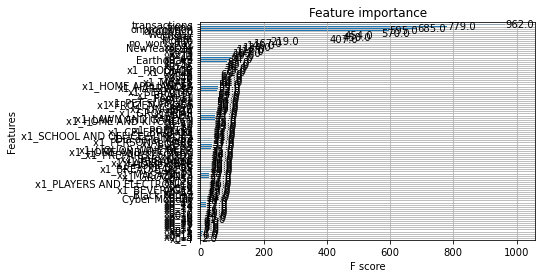

In [69]:
xgboost.plot_importance(xg_reg)

In [70]:
train_pred = xg_reg.predict(X_train_trans)
valid_pred = xg_reg.predict(X_valid_trans)

train_pred[train_pred < 0] = 0
valid_pred[valid_pred < 0] = 0

In [71]:
from sklearn.metrics import mean_squared_log_error
print('훈련데이터 rmsle: ', np.sqrt(mean_squared_log_error(y_train, train_pred)))
print('검증데이터 rmsle: ', np.sqrt(mean_squared_log_error(y_valid, valid_pred)))

훈련데이터 rmsle:  2.0791974598398797
검증데이터 rmsle:  1.708306023863807


In [ ]:
xg_reg = xgb.XGBRegressor(silent=False,
                              scale_pos_weight=1,
                              learning_rate=0.01,  
                              colsample_bytree = 0.8,
                              subsample = 0.8,
                              objective='reg:linear', 
                              n_estimators=3000, early_stopping_rounds = 70
                              max_depth=6, 
                              gamma=0,eval_metric='rmsle')
xg_reg.fit(X_train_trans,y_train)

In [ ]:
param_test1 = {
 'max_depth':range(3,10,3),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBRegressor(objective ='reg:linear', 
                                                 colsample_bytree = 0.5, 
                                                 learning_rate = 0.1, 
                                                 max_depth = 7, 
                                                 alpha = 10, 
                                                 n_estimators = 100,
                                                 early_stopping_rounds = 30,
                                                 eval_metric='rmsle'),
param_grid = param_test1, scoring='accuracy',n_jobs=-1,cv=5, verbose=10)
gsearch1.fit(X_train_trans,y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [ ]:
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = XGBRegressor(objective ='reg:linear', 
                                                 colsample_bytree = 0.5, 
                                                 learning_rate = 0.1, 
                                                 max_depth = 7, 
                                                 alpha = 10, 
                                                 n_estimators = 100,
                                                 early_stopping_rounds = 30,
                                                 eval_metric='rmsle'),
                        param_grid = param_test2, scoring='accuracy', n_jobs=-1, iid=False, cv=5)
gsearch2.fit(X_train_trans,y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: F

In [ ]:
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator = XGBRegressor(objective ='reg:linear', 
                                                 colsample_bytree = 0.5, 
                                                 learning_rate = 0.1, 
                                                 max_depth = 7, 
                                                 alpha = 10, 
                                                 n_estimators = 100,
                                                 early_stopping_rounds = 30,
                                                 eval_metric='rmsle'),
                        param_grid = param_test3, scoring='accuracy', n_jobs=-1, iid=False, cv=5, verbose=10)
gsearch3.fit(X_train_trans,y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

In [ ]:
param_test4 = {
 'subsample':[i/100.0 for i in range(40,80)],
}
gsearch4 = GridSearchCV(estimator = XGBRegressor(objective ='reg:linear', 
                                                 colsample_bytree = 0.5, 
                                                 learning_rate = 0.1, 
                                                 max_depth = 7, 
                                                 alpha = 10, 
                                                 n_estimators = 100,
                                                 early_stopping_rounds = 30,
                                                 eval_metric='rmsle'),
                        param_grid = param_test4, scoring='accuracy', n_jobs=-1, iid=False, cv=5, verbose=10)
gsearch4.fit(X_train_trans,y_train)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

In [ ]:
param_test5 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch5 = GridSearchCV(estimator = XGBRegressor(objective ='reg:linear', 
                                                 colsample_bytree = 0.5, 
                                                 learning_rate = 0.1, 
                                                 max_depth = 7, 
                                                 alpha = 10, 
                                                 n_estimators = 100,
                                                 early_stopping_rounds = 30,
                                                 eval_metric='rmsle'), 
                        param_grid = param_test5, scoring='accuracy', n_jobs=-1, iid=False, cv=5, verbose=10)
gsearch5.fit(X_train_trans,y_train)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

In [48]:
dtrain = xgb.DMatrix(data=X_train_trans,label=y_train)

In [50]:
dvalid = xgb.DMatrix(data=X_valid_trans,label=y_valid)

In [73]:
params={
    'objective' :'reg:linear', 'colsample_bytree' : 0.8, 'learning_rate' : 0.1, 'max_depth' : 7, 'alpha' : 10, 'n_estimators' : 100, 'eval_metric':'rmsle'
}
num_rounds=400

In [75]:
evals=[(dtrain,'train'),(dvalid,'eval')]
xgb_model=xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=50, evals=evals)

[15:59:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-rmsle:2.35625	eval-rmsle:1.82040
[1]	train-rmsle:2.25543	eval-rmsle:1.72841
[2]	train-rmsle:2.32170	eval-rmsle:1.72934
[3]	train-rmsle:2.42916	eval-rmsle:1.82952
[4]	train-rmsle:2.52469	eval-rmsle:1.92497
[5]	train-rmsle:2.55834	eval-rmsle:1.94903
[6]	train-rmsle:2.56793	eval-rmsle:1.94837
[7]	train-rmsle:2.62597	eval-rmsle:2.01452
[8]	train-rmsle:nan	eval-rmsle:2.03850
[9]	train-rmsle:2.7

In [76]:
train_pred = xgb_model.predict(dtrain)
valid_pred = xgb_model.predict(dvalid)

train_pred[train_pred < 0] = 0
valid_pred[valid_pred < 0] = 0

In [77]:
from sklearn.metrics import mean_squared_log_error
print('훈련데이터 rmsle: ', np.sqrt(mean_squared_log_error(y_train, train_pred)))
print('검증데이터 rmsle: ', np.sqrt(mean_squared_log_error(y_valid, valid_pred)))

훈련데이터 rmsle:  2.1250011832093696
검증데이터 rmsle:  1.6342112356077474


In [65]:
predictors = [x for x in dtrain.columns]

modelfit(xgb_model, dtrain, predictors)


AttributeError: 'DMatrix' object has no attribute 'columns'